# Olympics DataFrame Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

summer = pd.read_csv('summer.csv')
summer.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## Check for missing data & remove duplicates

In [3]:
# Check for any missing data

summer.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [4]:
# Examine the Country column's NaN values

summer[summer['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [5]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
# Drop rows with missing data

summer.drop(index=[29603, 31072, 31091, 31110], inplace=True)
summer.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [7]:
# Check for duplicates

summer.duplicated(keep=False).sum()

4

In [8]:
summer[summer.duplicated(keep=False)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16098,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29779,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold
29785,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


In [9]:
# Drop Duplicates

summer.drop(index=[16099, 29785], inplace=True)

# Alternative code:
# summer.drop_duplicates(inplace=True)

In [10]:
summer.duplicated().sum()

0

## Categorisation

In [11]:
# Check for columns that would benefit from categorisation

summer.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       22761
Country         147
Gender            2
Event           666
Medal             3
dtype: int64

In [12]:
summer[['Gender', 'Medal']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31159 entries, 0 to 31164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  31159 non-null  object
 1   Medal   31159 non-null  object
dtypes: object(2)
memory usage: 730.3+ KB


In [13]:
summer['Gender'] = summer['Gender'].astype('category')

In [14]:
summer['Medal'] = summer['Medal'].astype('category')

In [15]:
summer[['Gender', 'Medal']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31159 entries, 0 to 31164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  31159 non-null  category
 1   Medal   31159 non-null  category
dtypes: category(2)
memory usage: 304.5 KB


## Make Name column values more readable

In [16]:
# Make name column value more readable

names = [x.split(',') for x in summer['Athlete']]
new_name = [names[i][-1].strip() + ' ' + names[i][0] for i in range(len(names))]
summer['Athlete'] = new_name

In [17]:
summer.head(3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze


## Identify how many times each city held Olympics

In [18]:
years = summer['Year'].unique() #Create list of unique years

place, year = [], []

for i in years: # Loop through the list of unique years and add the 
                # city name only once per year to empty 'place' list
        
    pip=(summer.loc[summer['Year']==i, 'City'])
    place.append(pip.max())
    
    year.append(i) # add the year to the empty 'year' list

In [19]:
# Create DataFrame to hold the year and place list values

df = pd.DataFrame({'Location': place, 'Year': year})
df.sort_values('Year', ascending=True).head(7)

,Location,Year
0,Athens,1896
1,Paris,1900
2,St Louis,1904
3,London,1908
4,Stockholm,1912
5,Antwerp,1920
6,Paris,1924


In [20]:
# Create DataFrame to show frequency per location

freq = pd.DataFrame(df['Location'].value_counts())
freq.head(5)

,Location
London,3
Athens,2
Los Angeles,2
Paris,2
Antwerp,1


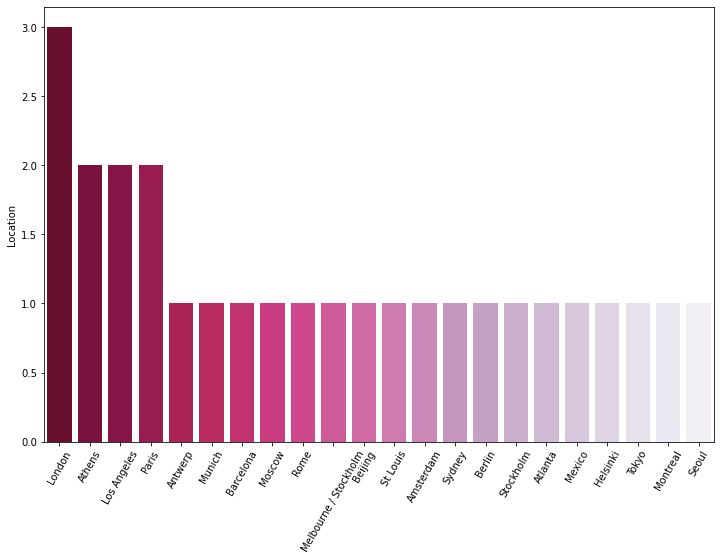

In [21]:
# Plot the data onto bar chart

plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
sns.barplot(x=freq.index, 
            y=freq['Location'], 
            data=freq, 
            palette='PuRd_r');

In [22]:
london = df.loc[df['Location']=='London']
london1 = london.iloc[0,1]
london2 = london.iloc[1,1]
london3 = london.iloc[2,1]
          
print(f"{freq.index[0]} held the Olypics {freq.iloc[0,0]} times; in years {london1}, {london2} and {london3}.")

London held the Olypics 3 times; in years 1908, 1948 and 2012.


## Show increase in number of events over the period

In [23]:
# Filter to remove duplicate medals and leave only Gold

summer_gold = summer.loc[summer['Medal'] == 'Gold']

# Slice to create smaller dataset with only Year and Events columns

summer_gold = summer_gold.iloc[:, [0, 7]]

In [24]:
# Check to see nr events per year

summer_gold.groupby('Year').Event.count()

Year
1896     64
1900    178
1904    188
1908    311
1912    301
1920    497
1924    301
1928    229
1932    213
1936    299
1948    276
1952    300
1956    298
1960    295
1964    330
1968    341
1972    387
1976    429
1980    459
1984    483
1988    506
1992    558
1996    615
2000    663
2004    659
2008    669
2012    633
Name: Event, dtype: int64

In [25]:
# Create array of unique years to loop through
years = summer_gold['Year'].unique()

# Loop through each year and drop duplicate events
for x in years:
    summer_gold.loc[summer_gold['Year']==x]
    summer_gold.drop_duplicates(keep='first', inplace=True)

In [26]:
# Check to see whether duplicate events removed

pip = summer_gold.groupby('Year').Event.count()
pip

Year
1896     43
1900     78
1904     92
1908    103
1912     94
1920    142
1924    114
1928     92
1932     95
1936    106
1948    111
1952    120
1956    122
1960    119
1964    126
1968    128
1972    143
1976    141
1980    145
1984    157
1988    162
1992    176
1996    178
2000    199
2004    201
2008    198
2012    192
Name: Event, dtype: int64

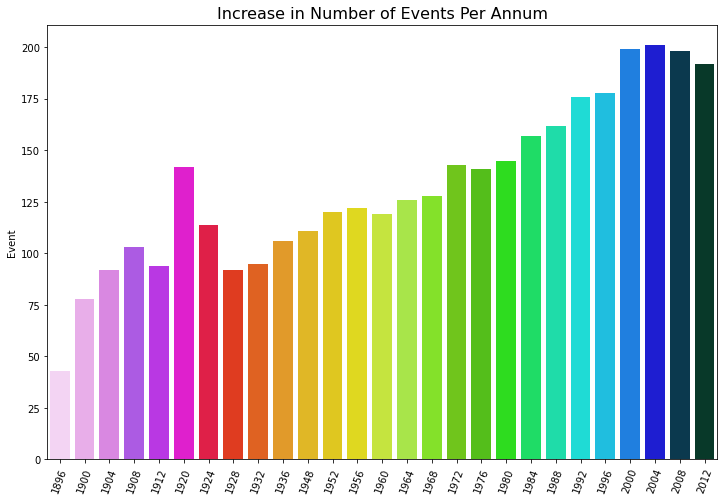

In [27]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
plt.title("Increase in Number of Events Per Annum", fontsize=16)
sns.barplot(x=years, 
            y=pip, 
            data=summer_gold,
            palette='gist_ncar_r');

## Show Top 10 Most successful countries by Gender

### Male

In [28]:
male = summer[summer['Gender'] == 'Men']
m_count = male['Country'].value_counts().head(10)
m_count

USA    3208
URS    1476
GBR    1412
FRA    1254
ITA    1161
SWE     953
GER     916
HUN     834
AUS     696
JPN     525
Name: Country, dtype: int64

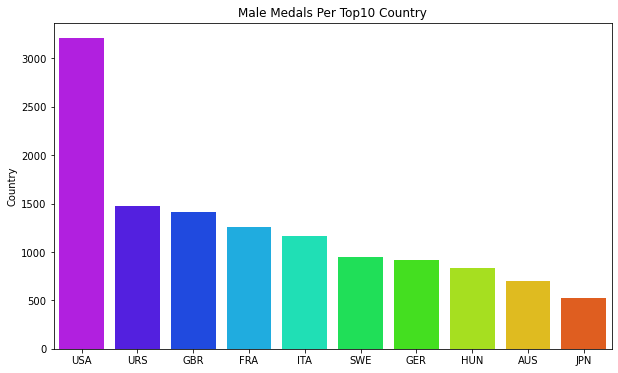

In [29]:
plt.figure(figsize=(10,6))
plt.title('Male Medals Per Top10 Country')
sns.barplot(x=m_count.index, 
            y=m_count, 
            data = male, 
            palette='gist_rainbow_r');

### Female

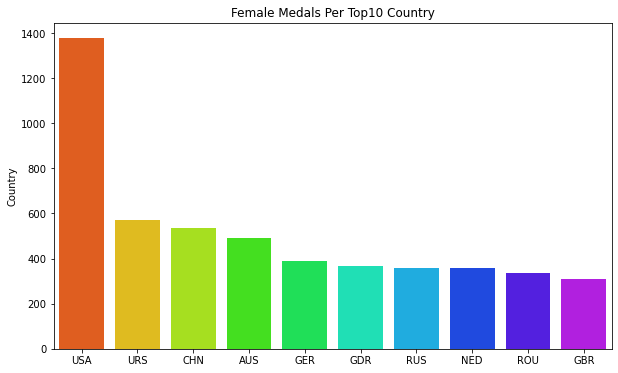

In [30]:
female = summer[summer['Gender'] == 'Women']
f_count = female['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.title('Female Medals Per Top10 Country')
sns.barplot(x=f_count.index, 
            y=f_count, 
            data = female, 
            palette='gist_rainbow');

## Most Successful Athletes in Most Successful Country

### Male

In [31]:
best_male = summer[(summer['Country'] == 'USA') & (summer['Gender'] == 'Men')]
best_male_list = best_male['Athlete'].value_counts().head(10)
best_male_list

Michael PHELPS           22
Carl Townsend OSBURN     11
Mark SPITZ               11
Ryan LOCHTE              11
Matthew BIONDI           11
Gary Jr. HALL            10
Carl LEWIS               10
Ray EWRY                  8
Jason LEZAK               8
Lloyd Spencer SPOONER     7
Name: Athlete, dtype: int64

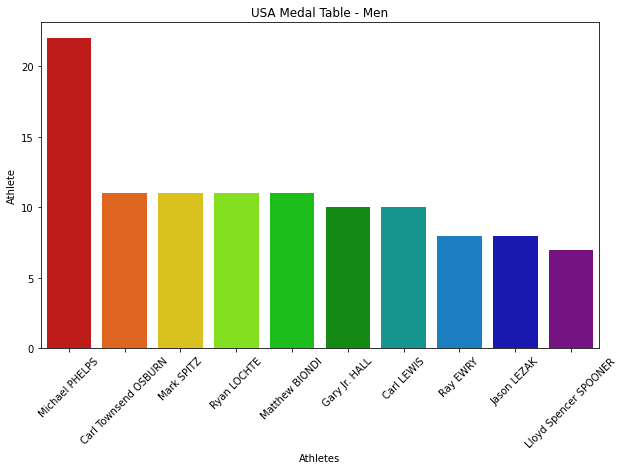

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title('USA Medal Table - Men')
plt.xlabel('Athletes')
sns.barplot(x=best_male_list.index, 
            y=best_male_list, 
            data = best_male,
            palette='nipy_spectral_r');

### Female

In [33]:
best_female = summer[(summer['Country'] == 'USA') & (summer['Gender'] == 'Women')]
best_female_list = best_female['Athlete'].value_counts().head(10)
best_female_list

Natalie COUGHLIN            12
Jenny THOMPSON              12
Dara TORRES                 12
Shirley Farber BABASHOFF     8
Shannon MILLER               7
Amanda BEARD                 7
Angel MARTINO                6
Amy VAN DYKEN                6
Jackie JOYNER-KERSEE         6
Rebecca SONI                 6
Name: Athlete, dtype: int64

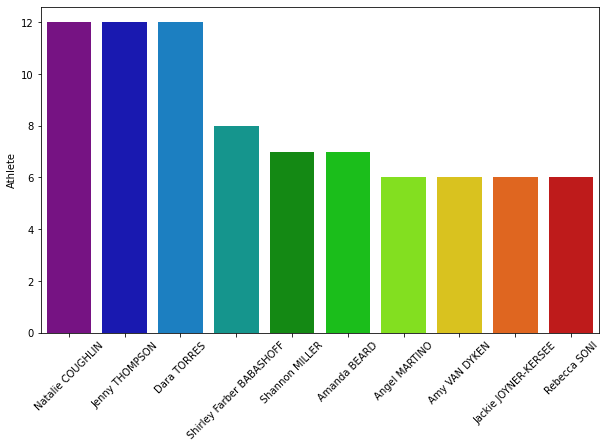

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x=best_female_list.index, 
            y=best_female_list, 
            data = best_female,
            palette = 'nipy_spectral');

## Best Ever Olympiad Medal Tally

In [35]:
# Filter to include only Michael Phelps
# Use .groupby() & .unstack() method to
# create medal table

m_p = summer.loc[summer['Athlete']=='Michael PHELPS']
m_p = m_p.groupby(['City', 'Year', 'Medal']).Medal.count().unstack(fill_value=0)
m_p = m_p[['Gold', 'Silver', 'Bronze']]
m_p

Medal         Gold  Silver  Bronze
City    Year                      
Athens  2004     6       0       2
        2008     0       0       0
        2012     0       0       0
Beijing 2004     0       0       0
        2008     8       0       0
        2012     0       0       0
London  2004     0       0       0
        2008     0       0       0
        2012     4       2       0

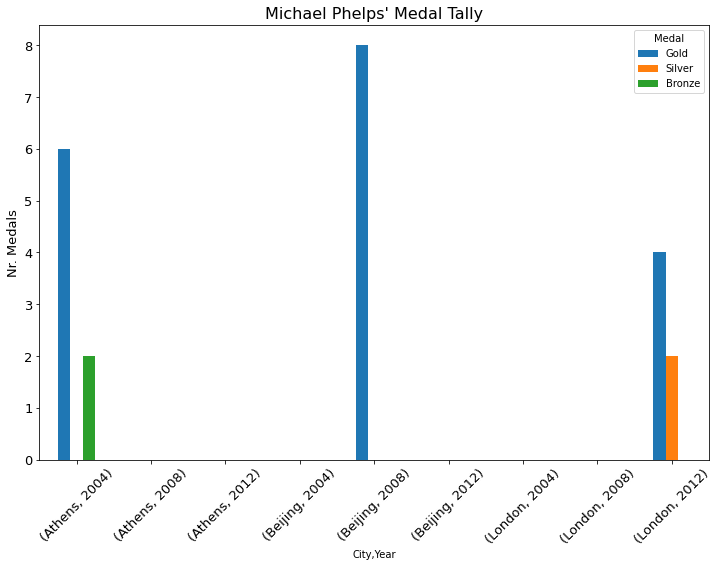

In [36]:
m_p.plot(kind='bar', figsize=(12, 8), fontsize=13)
plt.xticks(rotation=45)
plt.title("Michael Phelps' Medal Tally", fontsize=16)
plt.ylabel('Nr. Medals', fontsize=13)
plt.show()

## Establish Highest number of Medals Per Country Since 1896

In [50]:
medals = summer.groupby(['Country', 'Year']).Medal.count().unstack(fill_value=0)
medals

Year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012
Country,,,,,,,,,,,,,,,,,,,,,
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
AHO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ALG,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,3,5,0,2,1
ANZ,0,0,0,19,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARG,0,0,0,0,0,0,11,32,4,11,...,0,0,0,13,2,20,20,47,51,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
YUG,0,0,0,0,0,0,2,12,0,1,...,19,57,87,63,0,26,26,0,0,0
ZAM,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
# Establish largest value accross each row and
# assign to 'Highest' column in the 'Medals' dataframe

medals['Highest'] = medals.max(axis=1).round()
medals = medals.sort_values('Highest', ascending = False).head(10)


# Add the cooresponding Year to new 'Year' column by
# converting each row to an array and identifying the 
# index number of the highest value per row

year = []
for x in range(len(medals)):
    pip = np.array(medals.iloc[x, :28])
    i = np.argmax(pip)
    year.append(medals.columns[i])
medals['Year'] = year
medals.iloc[:, 27:30]


Year,Highest,Year
Country,,
URS,442,1980
USA,394,1904
GBR,347,1908
GDR,260,1980
EUN,223,1992
GER,210,1936
RUS,192,2004
BEL,188,1920
FRA,185,1900


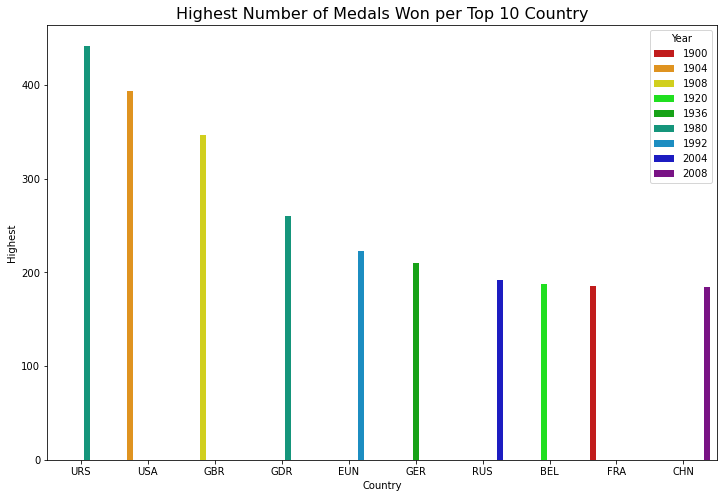

In [42]:
plt.figure(figsize = (12,8))
plt.title("Highest Number of Medals Won per Top 10 Country", fontsize=16)
sns.barplot(x=medals.index, 
            y=medals['Highest'], 
            data=medals,
            palette='nipy_spectral_r',
            hue='Year');

## Highest Gold Medal Count / Event / Top 10 Country

In [43]:
# Create list of Top10 Countries to loop through
top10_countries = summer['Country'].value_counts().head(10)
top10 = top10_countries.index
top10

Index(['USA', 'URS', 'GBR', 'FRA', 'GER', 'ITA', 'AUS', 'HUN', 'SWE', 'NED'], dtype='object')

In [44]:
# Loop through top 10 countries and add events, tally & country to lists
events, tally, ctry=[],[],[]

for i in top10:
    gold_ct = summer[(summer['Medal'] == 'Gold') & (summer['Country'] == i)]
    best = gold_ct['Event'].value_counts() 
    
    tally.append(best[0]) # Add the highest tally of medals per country to tally list
    
    ctry.append(i) # Add the corresponding country to ctry list
    
    events.append(str(best.nlargest(n=1))) # Add the highest ranking event
                                           # per country to events list
                                           # and convert to string to allow editing
    

In [45]:
# Inspect events list

events[:3]

['Basketball    258\nName: Event, dtype: int64',
 'Team Competition    94\nName: Event, dtype: int64',
 'Hockey    42\nName: Event, dtype: int64']

In [46]:
# Remove unwanted text from events list

discipline=[events[i].split(" ", 2)[0:2] for i in range(len(events))]


# Inspect discipline list

discipline[:3]

[['Basketball', ''], ['Team', 'Competition'], ['Hockey', '']]

In [47]:
# Combine event names, delete empty list items

final_events=[]
for x in discipline:
    if len(x[1]) == 0:
        final_events.append(x[0]) # append single word events as single word
    else:
        final_events.append((' ').join(x)) # join multiple word events and append

# Inspect final_events list
final_events[:3]

['Basketball', 'Team Competition', 'Hockey']

In [48]:
# Create dataframe using tally, ctry and final_events lists

pip = pd.DataFrame({"Event": final_events, "Medal Count": tally, "Country": ctry})
pip.sort_values('Medal Count', ascending=False)

,Event,Medal Count,Country
0,Basketball,258,USA
7,Water Polo,107,HUN
1,Team Competition,94,URS
9,Hockey,80,NED
4,Hockey,65,GER
6,Hockey,64,AUS
5,Team Competition,60,ITA
8,Team Competition,59,SWE
3,Foil Team,45,FRA
2,Hockey,42,GBR


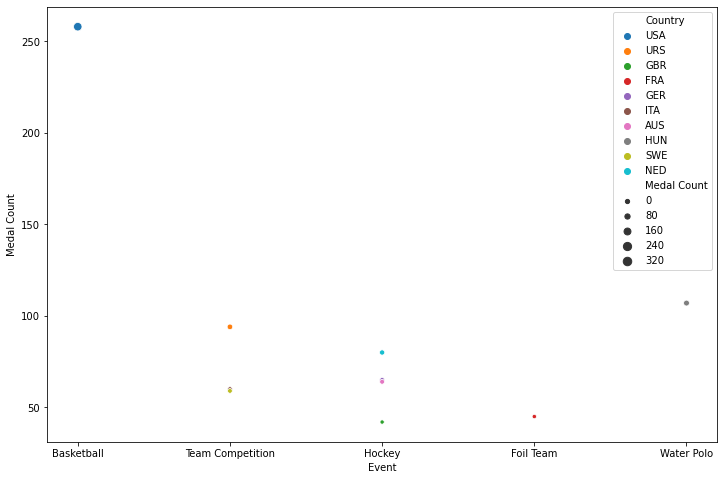

In [49]:
# Visualise with Scatterplot

plt.figure(figsize=(12,8))
sns.scatterplot(x='Event', 
                y='Medal Count', 
                data=pip, hue='Country', 
                size='Medal Count');